# Supervised Learning– Regression

The presence of the words **‘how much’** and **‘how many’** implies that the answer for these questions will be a quantitative or continuous number. The regression is one of the fundamental techniques that will help us to find answers to these types of questions by studying the relationship between the different variables that are relevant to the questions that we are trying to answer. <br>
Let’s consider a use case where we have collected students’ average test grade scores and their respective average number of study hours for the test for group of similar IQ students.

In [1]:
# Students score vs. hours studied
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load data
df = pd.read_csv('data/Grade_Set_1.csv')
print (df)

   Hours_Studied  Test_Grade
0              2          57
1              3          66
2              4          73
3              5          76
4              6          79
5              7          81
6              8          90
7              9          96
8             10         100


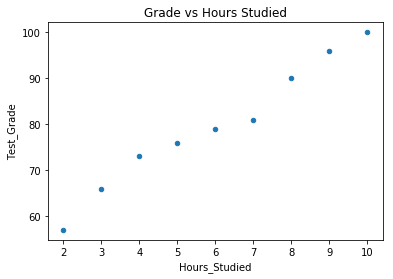

In [4]:
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')

The simple scatter plot shows that the grade gradually increases with the increase in hours studied. This implies that there is a linear relationship between the two variables.

In [5]:
# check the correlation between variables
print (df.corr())

               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.987797
Test_Grade          0.987797    1.000000


the correlation analysis shows that there is 98% positive relationship between the two variables, which means there is 98% chance that any change in study hours will lead to a change in grade.

# Correlation and Causation
Although correlation helps us determine the degree of relationship between two or more variables, it does not tell about the cause and effect relationship. A high degree of correlation does not always necessarily mean a relationship of cause and effect exists between variables. Note that correlation does not imply causation though the existence of
causation always implies correlation. Let’s understand this better with examples.
- More firemen’s presence during a fire instance signifies that the fire is big but the fire is not caused by firemen.
- When one sleeps with shoes on, he is likely to get a headache. This may be due to alcohol intoxication.
<br><br>
The significant degree of correlation in the above examples may be due to below reasons
- Small samples are prone to show a higher correlation due to pure chance.
  Variables may be influencing each other so it becomes hard to designate one as the cause and the other as the effect.
- Correlated variables may be influenced by one or more other related variables.
<br><br>
The domain knowledge or involvement of subject matter expert is very important to ascertain the correlation due to causation.

# Fitting a Slope
Let’s try to fit a slope line through all the points such that the error or residual, that is, the distance of line from each point is the best possible minimal.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Slope.JPG?raw=true "Fitting a Slope"

<br> 
The error could be positive or negative based on its location from the slope, because of which if we take a simple sum of all the errors, it will be zero. So we should square the error to get rid of negativity and then sum the squared error. Hence, the slope is also referred to as least squares line.

- The slope equation is given by Y = mX + c, where Y is the predicted value for a given x value.
- m is the change in y, divided by change in x, that is, m is the slope of the line for the x variable and it indicates the steepness at which it increases with every unit increase in x variable value.
- c is the intercept that indicates the location or point on the axis where it intersects, in the case of above figure it is 52. Intercept is a constant that represents the variability in Y that is not explained by the X. It is the value of Y when X is zero. 

Together the slope and intercept define the linear relationship between the two variables and can be used to predict or estimate an average rate of change. Now using this relation, for a new student we can determine the score based on his study hours. Say a student is planning to study an overall of 6 hours in preparation for the test. Simply drawing a connecting line from the x-axis and y-axis to the slope shows that there is a possibility of him scoring 80. We can use the slope equation to predict the score for any given number of hours of study. In this case the test grade is the dependent variable, denoted by ‘Y’ and hours studied is an independent variable or predictor, denoted by ‘X’. Let’s use the linear regression function from the scikit-learn library to find the values of m (x’s coefficient) and c (intercept).

Intercept:  49.6777777778
Coefficient:  [ 5.01666667]
Manual prdiction : 80.7485207083
Using predict function:  [ 79.77777778]


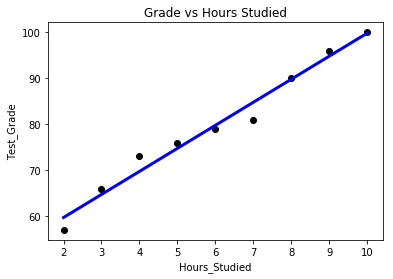

In [6]:
# Linear regression
# importing linear regression function
import sklearn.linear_model as lm
import numpy as np
# Create linear regression object
lr = lm.LinearRegression()
x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Test_Grade.values            # dependent variable
# Train the model using the training sets
lr.fit(x, y)
print ("Intercept: ", lr.intercept_)
print ("Coefficient: ", lr.coef_)
# manual prediction for a given value of x
print ("Manual prdiction :", 52.2928994083 + 4.74260355*6)
# predict using the built-in function
print ("Using predict function: ", lr.predict(6))
# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

Let’s put the appropriate values in the slope equation (m * X + c = Y), 4.74260355 * 6 + 52.2928994083 = 80.74 that means a student studying 6 hours has the probability of scoring 80.74 test grade.
<br>
** Note that if X is zero, the value of Y will be 52.29 that mean even if the student does not study there is a possibility that he’ll score 52.29; this signifies that there are other variables that have a causation effect on score that we currently do not have access to.**

# How Good Is Your Model?
There are three metrics widely used for evaluating linear model performance.
- **R-squared**
- **RMSE**
- **MAE**

# R-Squared for Goodness of Fit
The R-squared metric is the most popular practice of evaluating how well your model fits  the data. R-squared value designates the total proportion of variance in the dependent variable explained by the independent variable. It is a value between 0 and 1; the value toward 1 indicates a better model fit.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/R-squared.JPG?raw=true "R-Squared"


![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/R-squared2.JPG?raw=true "R-Squared"

**R-squared =  1510.01 / 1547.55 = 0.97**
<br>
In this case R-squared can be interpreted as 97% of variablility in the dependent variable (test score) can be explained by the independent variable (hours studied).

# Root Mean Squared Error (RMSE)
This is the square root of the mean of the squared errors. RMSE indicates how close the predicted values are to the actual values; hence a lower RMSE value signifies that the model performance is good. One of the key properties of RMSE is that the unit will be the same as the target variable.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/RMSE.JPG?raw=true "Root Mean Squared Error (RMSE)"

# Mean Absolute Error
This is the mean or average of absolute value of the errors, that is, the predicted - actual.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/MAE.JPG?raw=true "Fitting a Slope"

In [7]:
# Linear regression model accuracy matrices
# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
# add predict value to the data frame
df['Test_Grade_Pred'] = lr.predict(x)
# Manually calculating R Squared
df['SST'] = np.square(df['Test_Grade'] - df['Test_Grade'].mean())
df['SSR'] = np.square(df['Test_Grade_Pred'] - df['Test_Grade'].mean())
print ("Sum of SSR:", df['SSR'].sum())
print ("Sum of SST:", df['SST'].sum())
print ("R Squared using manual calculation: ", df['SSR'].sum() / df['SST'].sum())
# Using built-in function
print ("R Squared using built-in function: ", r2_score(df.Test_Grade, y))
print ("Mean Absolute Error: ", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))

Sum of SSR: 1510.016666666667
Sum of SST: 1547.5555555555559
R Squared using manual calculation:  0.9757431074095348
R Squared using built-in function:  1.0
Mean Absolute Error:  1.61851851852
Root Mean Squared Error:  2.04229959955


# Polynomial Regression
It is a form of higher-order linear regression modeled between dependent and independent variables as an nth degree polynomial. Although it’s linear it can fit curves better. Essentially we’ll be introducing higher-order degree variables of the same independent variable in the equation.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Polynomial.JPG?raw=true "Fitting a Slope"

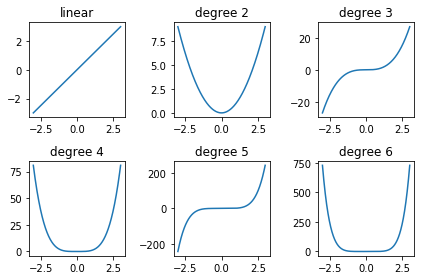

In [8]:
# Polynomial regression
x = np.linspace(-3,3,1000) # 1000 sample number between -3 to 3
# Plot subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
ax1.plot(x, x)
ax1.set_title('linear')
ax2.plot(x, x**2)
ax2.set_title('degree 2')
ax3.plot(x, x**3)
ax3.set_title('degree 3')
ax4.plot(x, x**4)
ax4.set_title('degree 4')
ax5.plot(x, x**5)
ax5.set_title('degree 5')
ax6.plot(x, x**6)
ax6.set_title('degree 6')
plt.tight_layout()# tidy layout

Let’s consider another set of students’ average test grade scores and their respective
average number of hours studied for similar IQ students. 

    Hours_Studied  Test_Grade
0             0.5          20
1             1.0          21
2             2.0          22
3             3.0          23
4             4.0          25
5             5.0          37
6             6.0          48
7             7.0          56
8             8.0          67
9             9.0          76
10           10.0          90
11           11.0          89
12           12.0          90


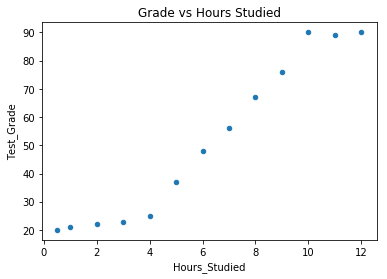

In [9]:
#Polynomial regression example
# Load data
df = pd.read_csv('data/Grade_Set_2.csv')
print (df)
# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')

In [10]:
# check the correlation between variables
print("Correlation Matrix: ")
df.corr()


Correlation Matrix: 


,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.974868
Test_Grade,0.974868,1.000000


R Squared:  0.9503677767


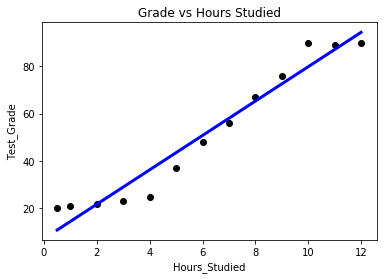

In [11]:
# Create linear regression object
lr = lm.LinearRegression()
x= df.Hours_Studied[:, np.newaxis]           # independent variable
y= df.Test_Grade                             # dependent variable
# Train the model using the training sets
lr.fit(x, y)
# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')
print ("R Squared: ", r2_score(y, lr.predict(x)))

The correlation analysis shows a 97% positive relationship between hours studied and the test grade, and 95% (r-squared) of variation in test grade can be explained by hours studied. Note that up to 4 hours of average study results in less than a 30 test grade and post 9 hours of study there is not a grade value to add to the grade. This is not a perfect linear relationship, although we can fit a linear line. <br>
Let’s try higher-order polynomial degrees.

0.9503677767
0.960872656868
0.993832312037
0.99550001841
0.99562049139


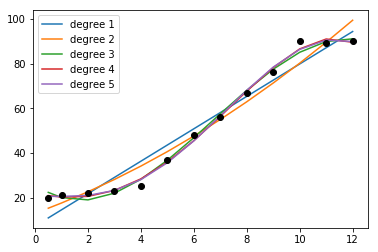

In [12]:
# r-squared for different polynomial degrees
lr = lm.LinearRegression()
x= df.Hours_Studied        # independent variable
y= df.Test_Grade           # dependent variable NumPy's vander function will return powers of the input vector
for deg in [1, 2, 3, 4, 5]:
    lr.fit(np.vander(x, deg + 1), y);
    y_lr = lr.predict(np.vander(x, deg + 1))
    plt.plot(x, y_lr, label='degree ' + str(deg));
    plt.legend(loc=2);
    print (r2_score(y, y_lr))
plt.plot(x, y, 'ok')

Note degree 1 here is the linear fit, and the higher-order polynomial regression is fitting the curve better and r-square jumps 4% higher at degree 3. Beyond the 3rd degree there is not a massive change in r-squared so we can say that the 3rd degree fits better. <br>
Scikit-learn provides a function to generate a new feature matrix consisting of all polynomial combinations of the features with the degree less than or equal to the specified degree

R Squared using built-in function:  0.99550001841


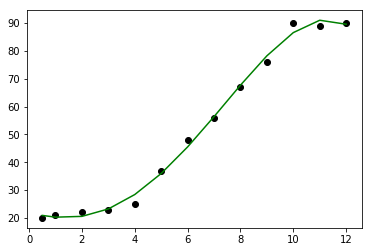

In [13]:
# scikit-learn polynomial features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Test_Grade                   # dependent variable
degree = 4
model = make_pipeline(PolynomialFeatures(degree), lr)
model.fit(x, y)
plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x), color='green')
print ("R Squared using built-in function: ", r2_score(y, model.predict(x)))

# Multivariate Regression
So far we have seen simple regression with one independent variable for a given dependent variable. In most of the real-life use cases there will be more than one independent variable, so the concept of having multiple independent variables is called **multivariate regression**. The equation takes the form below.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Multivariate%20Regression.JPG?raw=true "Multivariate Regression"
Here, each independent variable is represented by x’s, and m’s are the corresponding coefficients. We’ll be using the ‘statsmodels’ Python library to learn the basics of multivariate regression, as it provide more useful statistics results that are helpful from a learning perspective.
<br>
We'll be using the housing dataset (from RDatasets), which contains sales prices of houses in the city of Windsor. Below is the brief description about each variable.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Housing%20dataset.JPG?raw=true "Fitting a Slope"
<br><br>
Let’s build a model to predict the house price (dependent variable), by considering
the rest of the variables as independent variables.
The categorical variables need to be handled appropriately before running the first
iteration of the model. Scikit-learn provides useful built-in preprocessing functions to
handle categorical variables.
- **Label Binarizer:** This will replace the binary variable text with numeric vales. We’ll be using this function for the binary categorical variables.
- **Label Encoder:** This will replace category level with number representation.
- **One Hot Encoder:** This will convert n levels to n-1 new variable, and the new variables will use 1 to indicate the presence of level and 0 for otherwise. Note that before calling OneHotEncoder, we should use LabelEncoder to convert levels to number. Alternatively we can achieve the same using get_dummies of the Pandas package. This is much more efficient to use as we can directly use it on the column with text description without having to convert to numbers first.

# Multicollinearity and Variation Inflation Factor (VIF)
The dependent variable should have a strong relationship with independent variables.  However, any independent variables should not have strong correlations among other independent variables. Multicollinearity is an incident where one or more of the independent variables are strongly correlated with each other. In such incidents, we should use only one among correlated independent variables. VIF is an indicator of the existence of multicollinearity, and ‘statsmodel’ provides a function to calculate the VIF for each independent variable and a value of greater than 10 is the rule of thumb for possible existence of high multicollinearity. The standard guideline for VIF value is as follows, VIF = 1 means no correlation exists, VIF > 1, but < 5 means moderate correlation exists.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/VIF2.JPG?raw=true "Multicollinearity and Variation Inflation Factor"

/home/sara/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


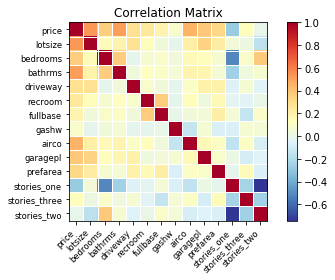

In [14]:
#Multicollinearity and VIF
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import statsmodels.api as sm
# Load data
df = pd.read_csv('data/Housing_Modified.csv')
# Convert binary fields to numeric boolean fields
lb = preprocessing.LabelBinarizer()
df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)
# Create dummy variables for stories
df_stories = pd.get_dummies(df['stories'], prefix='stories', drop_first=True)
# Join the dummy variables to the main dataframe
df = pd.concat([df, df_stories], axis=1)
del df['stories']
# lets plot correlation matrix using statmodels graphics packages's plot_corr
# create correlation matrix
corr = df.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

We can notice from the plot that stories_one has a strong negative correlation with stories_two. Let’s perform the VIF analysis to eliminate strongly correlated independent variables.

In [15]:
# Remove multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
# create a Python list of feature names
independent_variables = ['lotsize', 'bedrooms', 'bathrms','driveway','recroom', 'fullbase','gashw','airco','garagepl', 'prefarea', 'stories_one','stories_two','stories_three']
# use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['price']
thresh = 10
for i in np.arange(0,len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix)
for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print ("vif :", vif)
        print (('dropping \'' + X[independent_variables].columns[maxloc] + '\'at index: ' + str(maxloc)))
        del independent_variables[maxloc]
    else:
        break
print ('Final variables:', independent_variables)

vif : [8.9580980878443359, 18.469878559519948, 8.9846723472908643, 7.0885785420918799, 1.4770152815033919, 2.013320236472385, 1.1034879198994194, 1.7567462065609021, 1.9826489313438442, 1.5332946465459893, 3.9657526747868612, 5.5117024083548918, 1.7700402770614867]
dropping 'bedrooms'at index: 1
Final variables: ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_one', 'stories_two', 'stories_three']


We can notice that VIF analysis has elemenated bedrooms has its greater than
10, however stories_one and stories_two has been retained.
Let’s run the first iteration of multivariate regression model with the set
of independent variables that has passed the VIF analysis.
To test the model performance the common practice is to split the dataset
into 80/20 (or 70/30) for train/test respectively and use the train data
set to build the model, then apply the trained model on the test dataset
evaluate the performance of the model.

In [16]:
#Build the multivariate linear regression model
from sklearn import metrics
# create a Python list of feature names
independent_variables = ['lotsize', 'bathrms','driveway', 'recroom', 'fullbase','gashw','airco','garagepl', 'prefarea', 'stories_one','stories_two','stories_three']
# use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['price']
# Split your data set into 80/20 for train/test datasets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1)
# create a fitted model & print the summary
lm = sm.OLS(y_train, X_train).fit()
print (lm.summary())
# make predictions on the testing set
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print ("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print ("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print ("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print ("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     731.3
Date:                Thu, 14 Dec 2017   Prob (F-statistic):          1.46e-274
Time:                        09:39:16   Log-Likelihood:                -4828.1
No. Observations:                 436   AIC:                             9680.
Df Residuals:                     424   BIC:                             9729.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.8626      0.401      9.629

/home/sara/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Result1.JPG?raw=true "Fitting a Slope"

# Interpreting the OLS Regression Results
**Adjusted R-squared:** Simple R-squared value will keep increase with addition of independent variable. To fix this issue adjusted R-squared is considered for multivariate regression to understand the explanatory power of the independent variables.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Adjusted%20R-squared.JPG?raw=true "Adjusted R-squared"
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Adjusted%20R-squared2.JPG?raw=true "Adjusted R-squared"
Here, N is total observations or sample size and p is the number of predictors.

- Above figure  shows how R-squared follows Adjusted R-squared with increase of more variables
- With inclusion of more variables R-squared always tend to increase
- Adjusted R-squared will drop if the variable added does not explain the variable in the dependent variable
<br><br>
**Coefficient:** These are the individual coefficients for respective independent variables. It can be either a positive or negative number, which indicates that an increase in every unit of that independent variable will have a positive or negative impact on the dependent variable value.
<br><br>
**Standard error:** This is the average distance of the respective independent observed values from the regression line. The smaller values show that the model fitting is good.
<br><br>
**Durbin-Watson:** It’s one of the common statistics used to determine the existence of multicollinearity, which means two or more independent variables used in the multivariate regression model are highly correlated. The Durbin-Watson statistics are always between the number 0 and 4. A value around 2 is ideal (range of 1.5 to 2.5 is
relatively normal), and it means that there is no autocorrelation between the variables used in the model.<br><br>
**Confidence interval:** This is the coefficient to calculate 95% confidence interval for the independent variable’s slope.<br><br>
**t and p-value:** p-value is one of the import statistics. In order to get a better understanding we’ll have to understand the concept of hypothesis testing and normal distribution.<br><br>
**Hypothesis testing** is an assertion regarding the distribution of the observations and validating this assertion. The hypothesis testing steps are given below.


- A hypothesis is made.
- The validity of the hypothesis is tested.
- If the hypothesis is found to be true, it is accepted.
- If it is found to be untrue, it is rejected.
- The hypothesis that is being tested for possible rejection is called null hypothesis.
- Null hypothesis is denoted by H 0 .
- The hypothesis that is accepted when null hypothesis is rejected is called alternate hypothesis H a .
- The alternative hypothesis is often the interesting one and often the one that someone sets out to prove.
- For example, null hypothesis H0 is that the lot size has a real effect on house price; in this case the coefficient m is equal to zero in the regression equation (y = m * lot size + c).
- Alternative hypothesis H a is that the lot size does not have a real effect on house price and the effect you saw was due to chance.
<br><br>
This means the coefficient m is not equal to zero in the regression equation.
- In order to be able to say whether the regression estimate is close enough to the hypothesized value to be acceptable, we take the range of estimate implied by the estimated variance and look to see whether this range will contain the hypothesized value. To do this, we can transform the estimate into a standard normal distribution and we know that 95% of all values of a variable that has a mean of 0 and a variance of 1 will lie within 0 to 2 standard deviations. Given a regression estimate and its standard error, we can be 95% confident that the true (unknown) value of m will lie in this region. See below figure.
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Adjusted%20R-squared3.JPG?raw=true "Adjusted R-squared"
- The t-value is used to determine a p value (probability), and p-value ≤ 0.05 signifies strong evidence against the
null hypothesis, so you reject the null hypothesis. A p-value > 0.05 signifies weak evidence against the null hypothesis, so you fail to reject the null hypothesis. So in our case the variables with ≤ 0.05 means the variables are significant for the model.
- Process of testing a hypothesis indicates that there is a possibility of making an error. There are two types of errors for any given dataset, and these two types of errors are inversely related, which means the smaller the risk of one, the higher the risk of the other.
- Type I error: The error of rejecting the null hypothesis H0 even though H0 was true.
- Type II error: The error of accepting the null hypothesis H0 even though H0 was false.
- Note that variable ‘stores_three’ and ‘recroom’ have a large p value indicating it’s insignificant. So let’s re-run the regression without this variable and look at the results.
- Note that dropping the variables has not impacted adjusted

# Outliers
Data points that are far away from the fitted regression line are called outliers, and these can impact the accuracy of the model. Plotting normalized residual vs. leverage will give us a good understanding of the outliers points. Residual is the difference between actual vs. predicted, and leverage is a measure of how far away the independent variable values of an observation are from those of the other observations. 

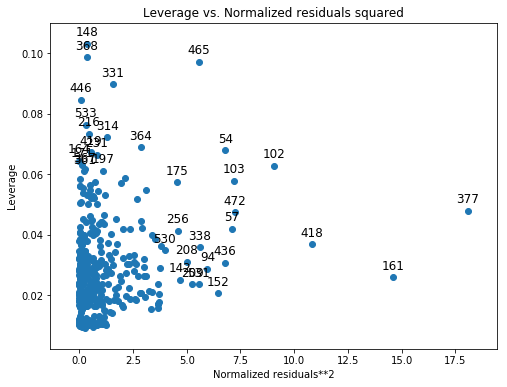

In [17]:
# lets plot the normalized residual vs leverage
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(lm, ax = ax)

From the chart we see that there are many observations that have high leverage and  residual. Running a Bonferroni outlier test will give us p-values for each observation, and those observations with p value < 0.05 are the outliers affecting the accuracy. It is a good practice to consult or apply business domain knowledge to make a decision on removing the outlier points and re-running the model, as these points could be natural in the process although they are mathematically found as outliers.

In [18]:
# Find outliers #
# Bonferroni outlier test
test = lm.outlier_test()
print ('Bad data points (bonf(p) < 0.05):')


Bad data points (bonf(p) < 0.05):


# Homoscedasticity and Normality
The error variance should be constant, which is known has homoscedasticity and the
error should be normally distributed. 


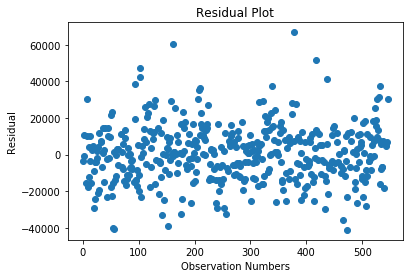

(array([  1.69673927e-06,   5.93858745e-06,   1.63311155e-05,
          2.62994587e-05,   2.56631815e-05,   1.03925280e-05,
          3.81766336e-06,   1.48464686e-06,   4.24184818e-07,
          4.24184818e-07]),
 array([-41229.44011477, -30415.38980753, -19601.33950029,  -8787.28919305,
          2026.76111419,  12840.81142144,  23654.86172868,  34468.91203592,
         45282.96234316,  56097.0126504 ,  66911.06295764]),
 <a list of 10 Patch objects>)

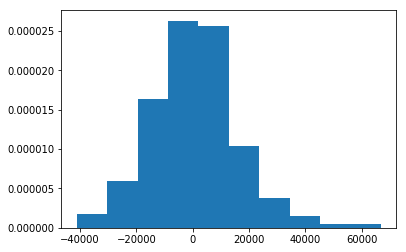

In [19]:
# Homoscedasticity test
# plot to check homoscedasticity
plt.plot(lm.resid,'o')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Observation Numbers')
plt.show()
plt.hist(lm.resid, normed=True)

**Linearity** – the relationships between the predictors and the outcome variables should be linear. If the relationship is not linear then appropriate transformation (such as log, square root, and higher-order polynomials etc) should be applied to the dependent/ independent variable to fix the issue.


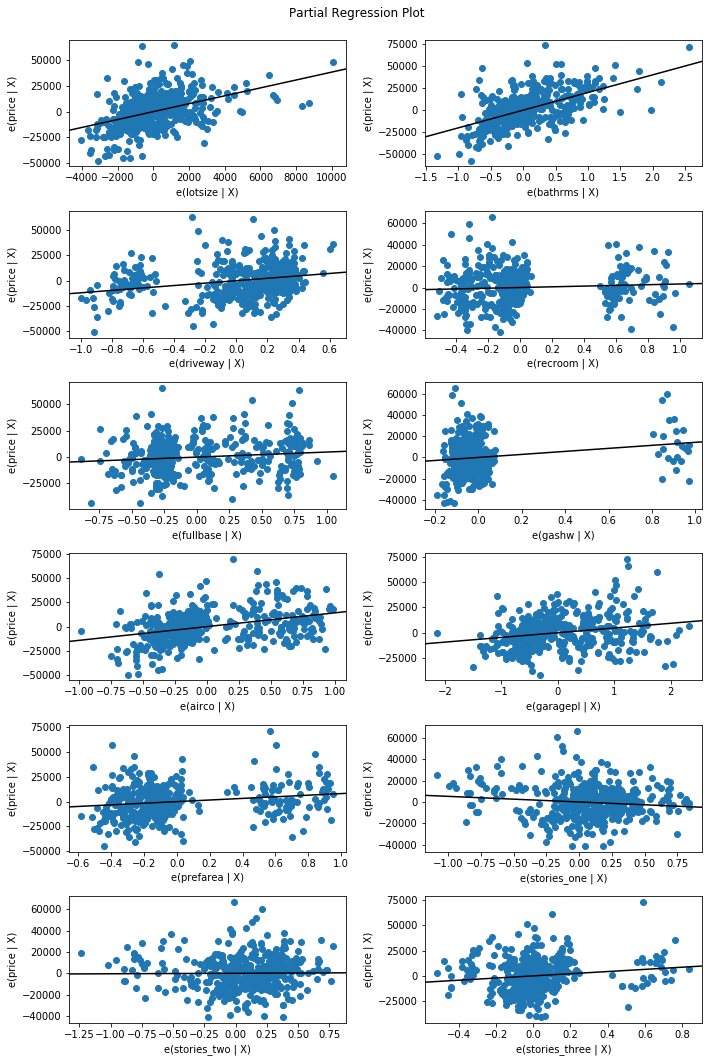

In [20]:
# Linearity check
# linearity plots
fig = plt.figure(figsize=(10,15))
fig = sm.graphics.plot_partregress_grid(lm, fig=fig)

# Over-fitting and Under-fitting
**Under-fitting** occurs when the model does not fit the data well and is unable to capture the underlying trend in it. In this case we can notice a low accuracy in training and test dataset. <br>
To the contrary, **over-fitting** occurs when the model fits the data too well, capturing
all the noises. In this case we can notice a high accuracy in the training dataset, whereas
the same model will result in a low accuracy on the test dataset. This means the model
has fitted the line so well to the train dataset that it failed to generalize it to fit well on
an unseen dataset. Figure below shows how the different fitting would look like on the
earlier discussed example use case. The choice of right order polynomial degree is very
important to avoid an over-fitting or under-fitting issue in regression. 
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Fitting.JPG?raw=true "Fitting a Slope"

# Regularization
With an increase in number of variables, and increase in model complexity, the probability
of over-fitting also increases. Regularization is a technique to avoid the over-fitting
problem. Over-fitting occurs when the model fits the data too well, capturing all the noises.
In this case we can notice a high accuracy in the training dataset, whereas the same model
will result in a low accuracy on the test dataset. This means the model has fitted the line so
well to the train dataset that it failed to generalize it to fit well on the unseen dataset.
Statsmodel and the scikit-learn provides **Ridge and LASSO (Least Absolute Shrinkage
and Selection Operator) regression** to handle the over-fitting issue. With an increase in
model complexity, the size of coefficients increase exponentially, so the ridge and LASSO
regression apply penalty to the magnitude of the coefficient to handle the issue.
## LASSO:
This provides a sparse solution, also known as L1 regularization. It guides
parameter value to be zero, that is, the coefficients of the variables that add minor
value to the model will be zero, and it adds a penalty equivalent to absolute value of the
magnitude of coefficients.
## Ridge Regression: 
Also known as Tikhonov (L2) regularization, it guides parameters to
be close to zero, but not zero. You can use this when you have many variables that add minor
value to the model accuracy individually; however it improves overall the model accuracy
and cannot be excluded from the model. Ridge regression will apply a penalty to reduce the
magnitude of the coefficient of all variables that add minor value to the model accuracy,
and which adds penalty equivalent to square of the magnitude of coefficients. Alpha is the
regularization strength and must be a positive float.

![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Regularizations.JPG?raw=true "Fitting a Slope"

In [22]:
# Regularization
from sklearn import linear_model
# Load data
df = pd.read_csv('data/Grade_Set_2.csv')
df.columns = ['x','y']
for i in range(2,50):              # power of 1 is already there
    colname = 'x_%d'%i            # new var will be x_power
    df[colname] = df['x']**i
independent_variables = list(df.columns)
independent_variables.remove('y')
X= df[independent_variables]       # independent variable
y= df.y                            # dependent variable
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80,
random_state=1)
# Ridge regression
lr = linear_model.Ridge(alpha=0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print ("------ Ridge Regression ------")
print ("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print ("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print ("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print ("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print ("Ridge Coef: ", lr.coef_)
# LASSO regression
lr = linear_model.Lasso(alpha=0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print ("----- LASSO Regression -----")
print ("Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print ("Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print ("Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print ("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print ("LASSO Coef: ", lr.coef_)

------ Ridge Regression ------
Train MAE:  12.8223805516
Train RMSE:  16.7321251299
Test MAE:  22.3577946841
Test RMSE:  22.3925554302
Ridge Coef:  [  1.01446487e-88   1.27690319e-87   1.41113660e-86   1.49319913e-85
   1.54589299e-84   1.58049535e-83   1.60336716e-82   1.61825366e-81
   1.62742313e-80   1.63228352e-79   1.63372709e-78   1.63232721e-77
   1.62845333e-76   1.62233965e-75   1.61412730e-74   1.60389073e-73
   1.59165478e-72   1.57740595e-71   1.56110004e-70   1.54266755e-69
   1.52201757e-68   1.49904080e-67   1.47361205e-66   1.44559243e-65
   1.41483164e-64   1.38117029e-63   1.34444272e-62   1.30448024e-61
   1.26111524e-60   1.21418622e-59   1.16354417e-58   1.10906042e-57
   1.05063662e-56   9.88217010e-56   9.21803842e-55   8.51476330e-54
   7.77414158e-53   6.99926407e-52   6.19487106e-51   5.36778815e-50
   4.52745955e-49   3.68659929e-48   2.86198522e-47   2.07542549e-46
   1.35493365e-45   7.36155358e-45   2.64098894e-44  -4.76790286e-45
   2.09597535e-46]
-----

/home/sara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/home/sara/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Nonlinear Regression
Linear models are mostly linear in nature, although they need not be straight fitting. In contrast the nonlinear model’s fitted line can take any shape; this scenario usually occurs when models are derived on the basis of physical or biological considerations. The nonlinear models have direct interpretation in terms of the process under study.
Scipy library provides curve_fit function to fit models to scientific data based on a theory to determine the parameters of a physical system. Some of the example use cases are Michaelis–Menten’s enzyme kinetics, weibull distribution, power law distribution, etc.

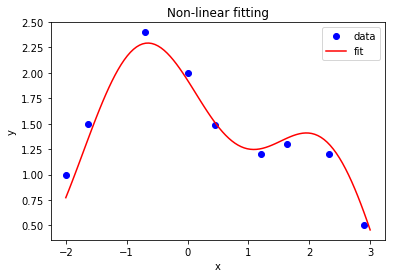

In [23]:
# Nonlinear regression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
x= np.array([-2,-1.64,-0.7,0,0.45,1.2,1.64,2.32,2.9])
y = np.array([1.0, 1.5, 2.4, 2, 1.49, 1.2, 1.3, 1.2, 0.5])
def func(x, p1,p2):
    return p1*np.sin(p2*x) + p2*np.cos(p1*x)
popt, pcov = curve_fit(func, x, y,p0=(1.0,0.2))
p1 = popt[0]
p2 = popt[1]
residuals = y - func(x,p1,p2)
fres = sum(residuals**2)
curvex=np.linspace(-2,3,100)
curvey=func(curvex,p1,p2)
plt.plot(x,y,'bo ')
plt.plot(curvex,curvey,'r')
plt.title('Non-linear fitting')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['data','fit'],loc='best')
plt.show()

In [ ]:
![alt text][logo]

[logo]: https://github.com/sara-kassani/Python/blob/master/data/Adjusted%20R-squared.JPG?raw=true "Fitting a Slope"